# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# Import Dataset

In [2]:
df=pd.read_csv("/content/insurance.csv")


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [59]:
df.columns

Index(['age', 'bmi', 'children', 'expenses', 'male', 'yes', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [5]:
df.shape

(1338, 7)

The given dataset consist of 1338 number of rowa and 7 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In the given dataset Sex, Smoker and Region column is object data type

In [7]:
df.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

The given data cinsist of No Null values

In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


It shows the stats of data in terms of mean, median, mode, std.deviation, minimum & maximum value and also percentile distribution of data

In [10]:
df.mean()

<ipython-input-10-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


age            39.207025
bmi            30.665471
children        1.094918
expenses    13270.422414
dtype: float64

In [11]:
df.median()

<ipython-input-11-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.00
bmi           30.40
children       1.00
expenses    9382.03
dtype: float64

In [12]:
df.mode()

,age,sex,bmi,children,smoker,region,expenses
0,18.0,male,27.6,0.0,no,southeast,1639.56
1,NaN,NaN,33.3,NaN,NaN,NaN,NaN


In [13]:
df.std()

<ipython-input-13-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


age            14.049960
bmi             6.098382
children        1.205493
expenses    12110.011240
dtype: float64

# EDA

Univariate

<ipython-input-14-43ce1eaa6b77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'],bins=20,color='green',kde=True)


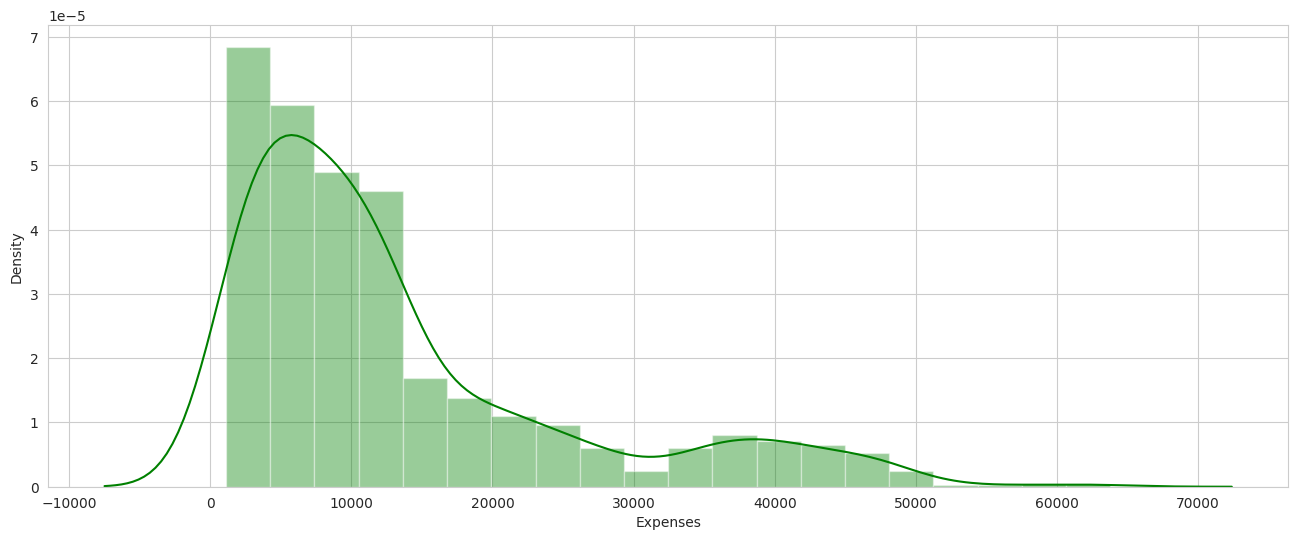

In [14]:
plt.figure(figsize=(16,6))
sns.set_style(style="whitegrid")
sns.distplot(df['expenses'],bins=20,color='green',kde=True)
plt.grid=True
plt.xlabel("Expenses")
plt.ylabel("Density")
plt.show()

Distribution of expenses is right skewed

<ipython-input-15-35900578e00c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde=True,color='green',bins=20)


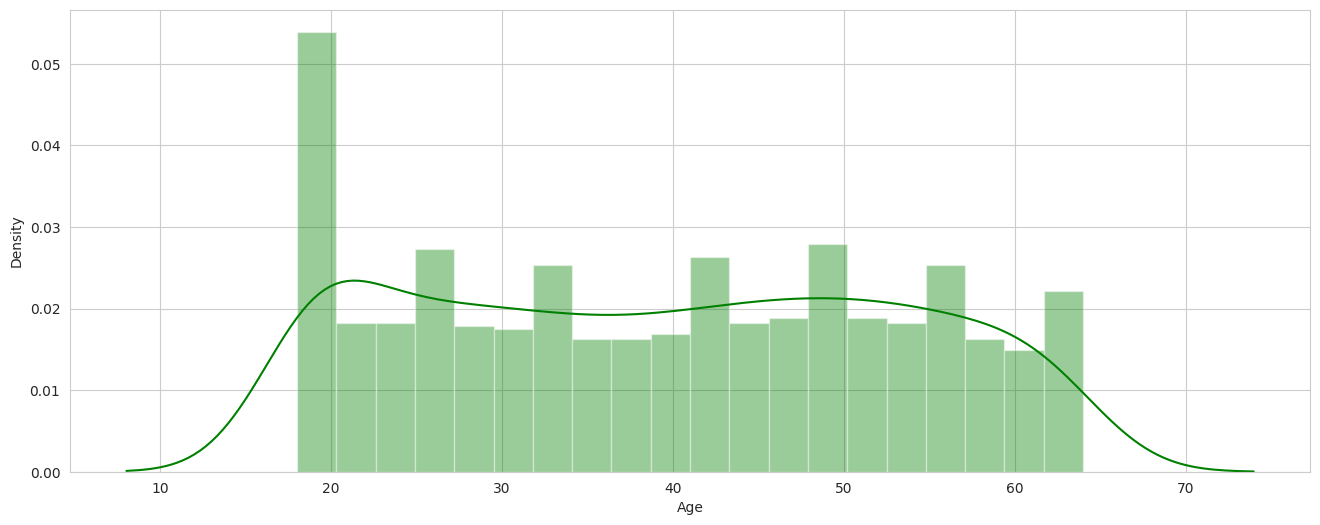

In [15]:
plt.figure(figsize=(16,6))
sns.set_style(style="whitegrid")
sns.distplot(df['age'],kde=True,color='green',bins=20)
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

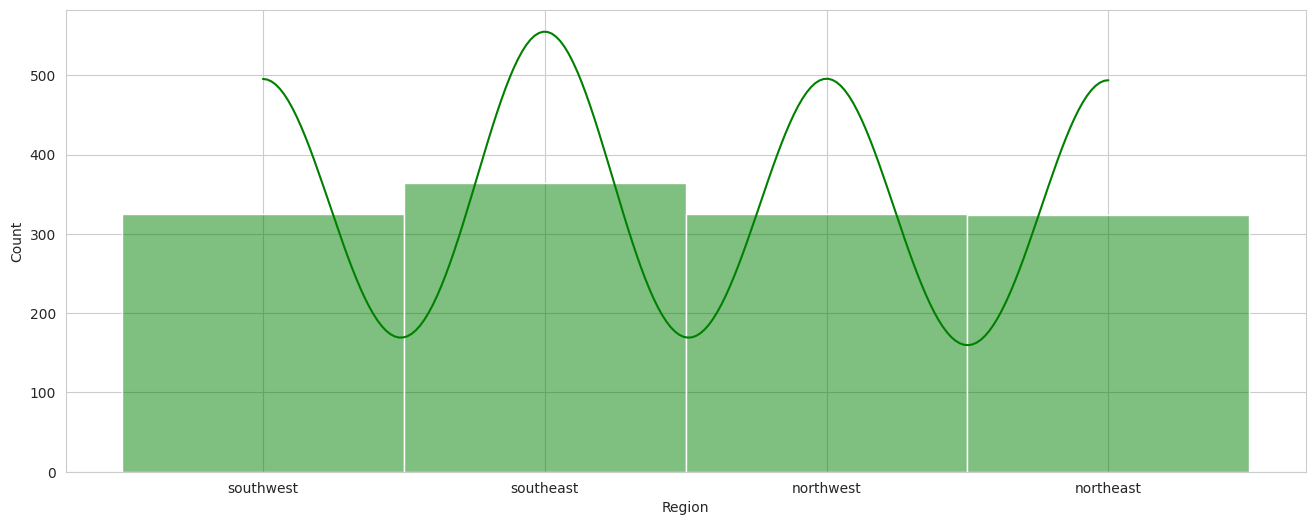

In [16]:
plt.figure(figsize=(16,6))
sns.histplot(x=df['region'],color='green',kde=True,bins=20)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


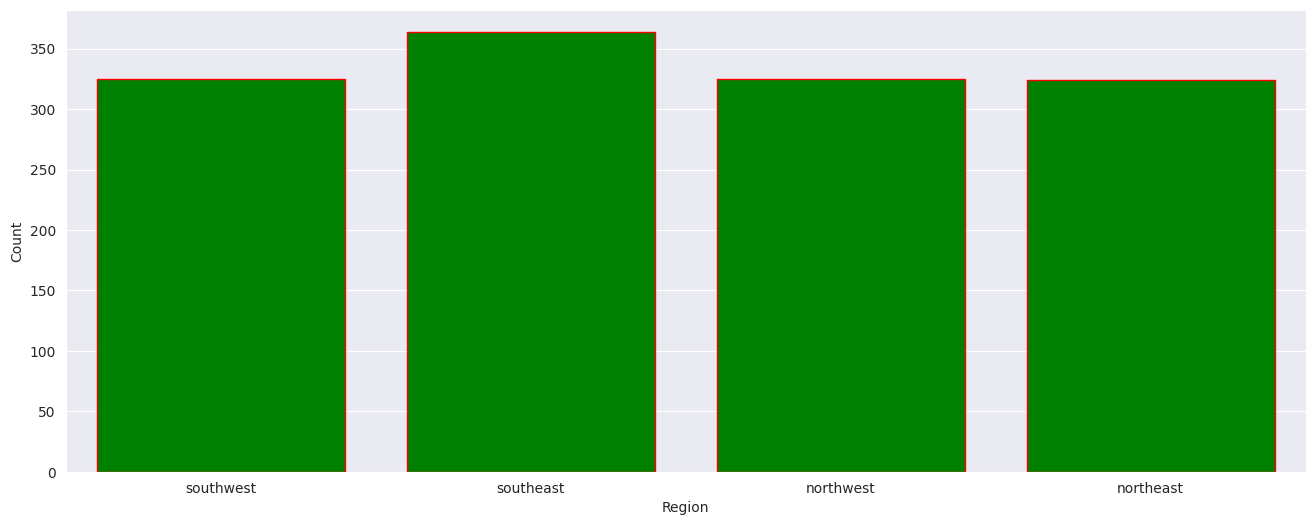

In [17]:
plt.figure(figsize=(16,6))
sns.set_style(rc={"gridcolor": "0.5"},style="darkgrid")
sns.countplot(x=df['region'],color='green',edgecolor="red",saturation=1.5)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


<ipython-input-18-edc9defb22d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['bmi'],kde=True,color="Green",bins=20)


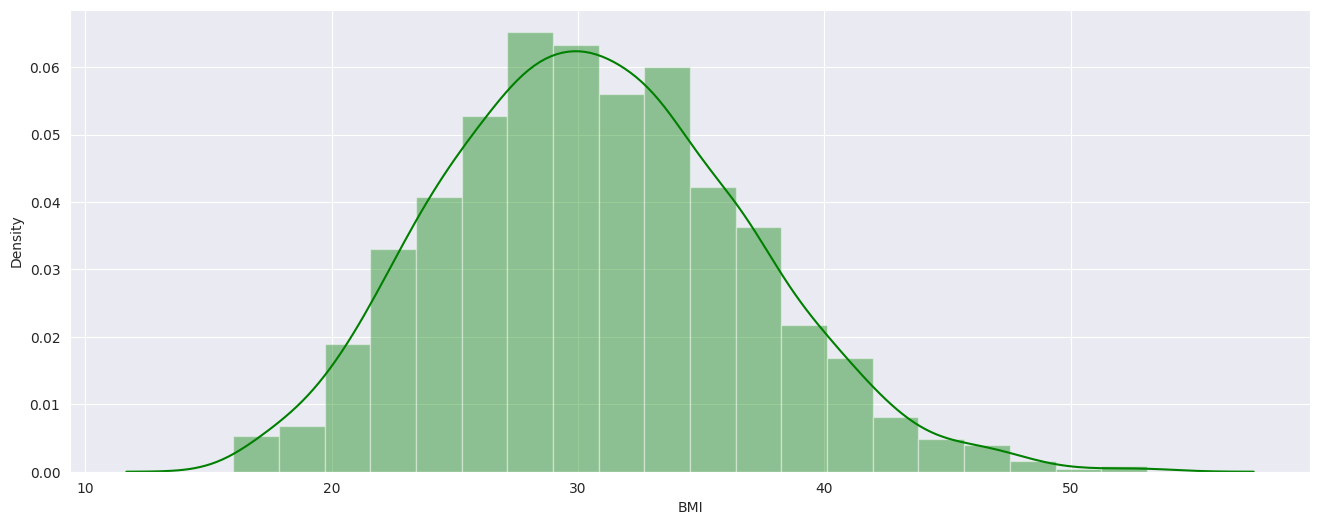

In [18]:
plt.figure(figsize=(16,6))
sns.distplot(x=df['bmi'],kde=True,color="Green",bins=20)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()


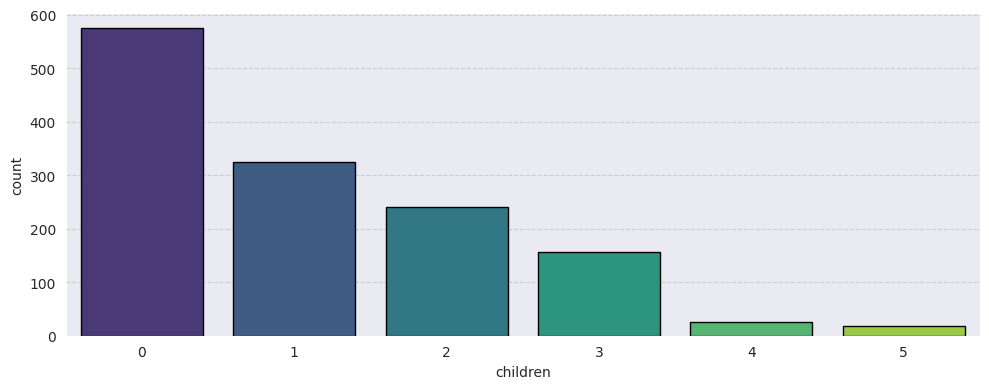

In [19]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['children'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.show()

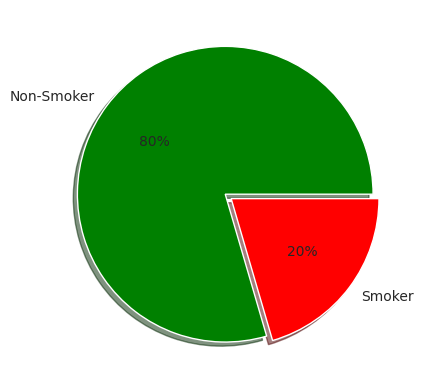

In [20]:
# To see the comp[osition of smoker
out_df=pd.DataFrame(df.groupby("smoker")["smoker"].count())
plt.pie(out_df['smoker'],labels=['Non-Smoker','Smoker'],radius=1,autopct="%.0f%%",shadow=True,colors="green",explode=(0,0.05))
plt.show()


# Multivariate

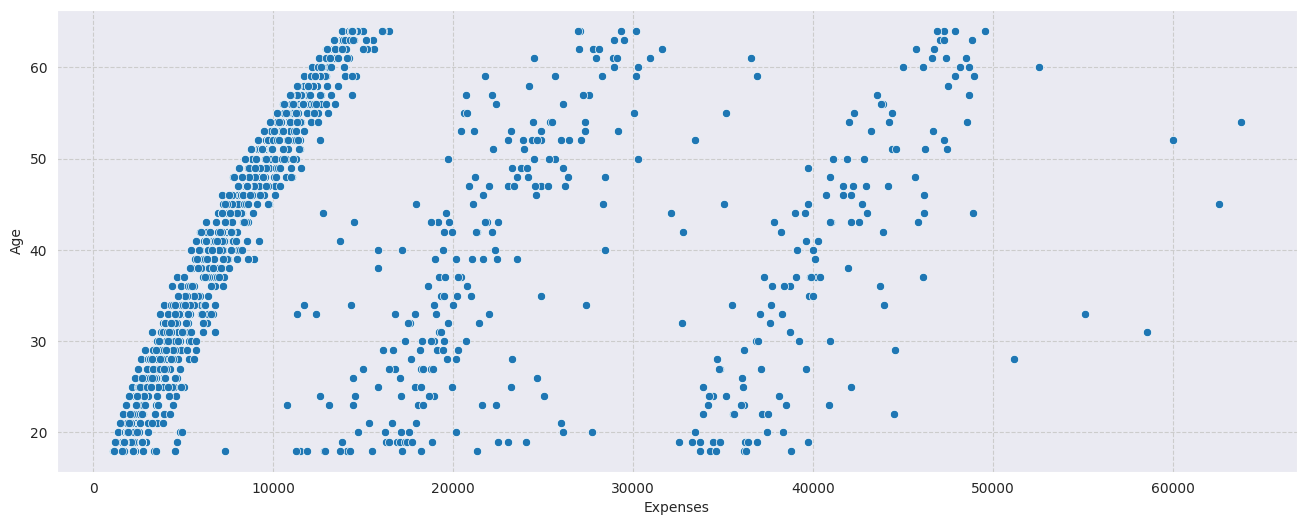

In [21]:
plt.figure(figsize=(16,6))
sns.scatterplot(y=df["age"],x=df['expenses'])
plt.xlabel("Expenses")
plt.ylabel("Age")
plt.show()

In this graph you can see that younger applicants have lower expenses and older applicants have higher expenses.

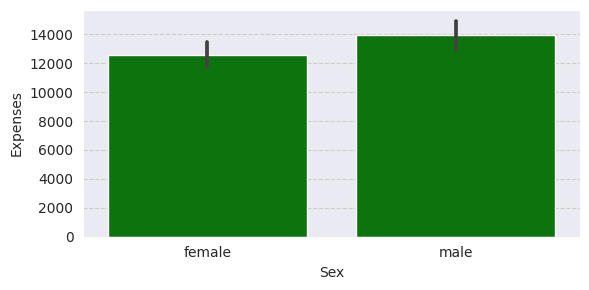

In [22]:
plt.figure(figsize=(6,3))
sns.barplot(x=df['sex'],y=df['expenses'],color='green',saturation=0.8)
plt.xlabel("Sex")
plt.ylabel("Expenses")
plt.tight_layout()
plt.show()

Male applicant have a bit higher expense as compared to female.

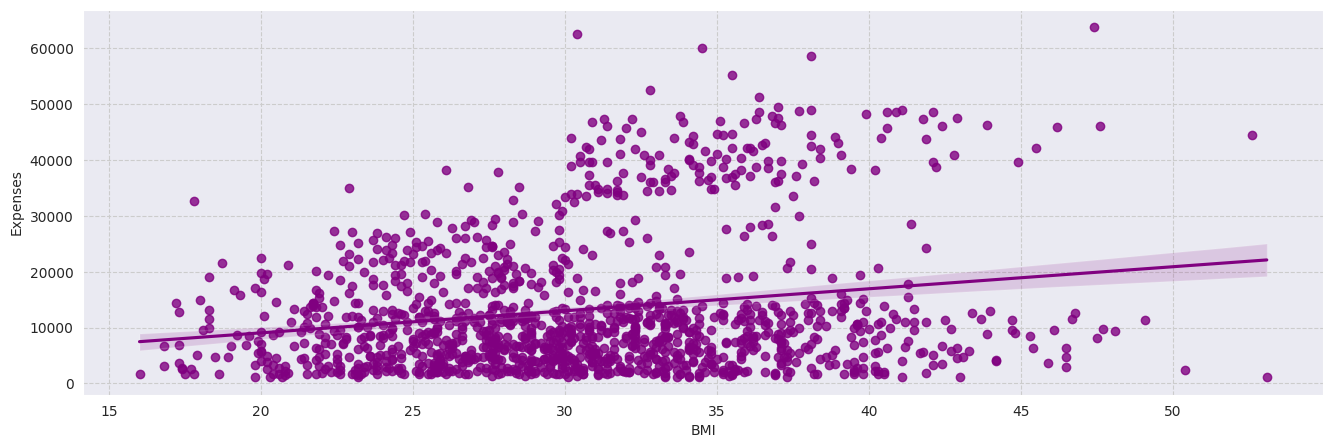

In [23]:
plt.figure(figsize=(16,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.regplot(x=df['bmi'],y=df['expenses'],color="purple")
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.show()

There is a slight positive relation between BMI and expense

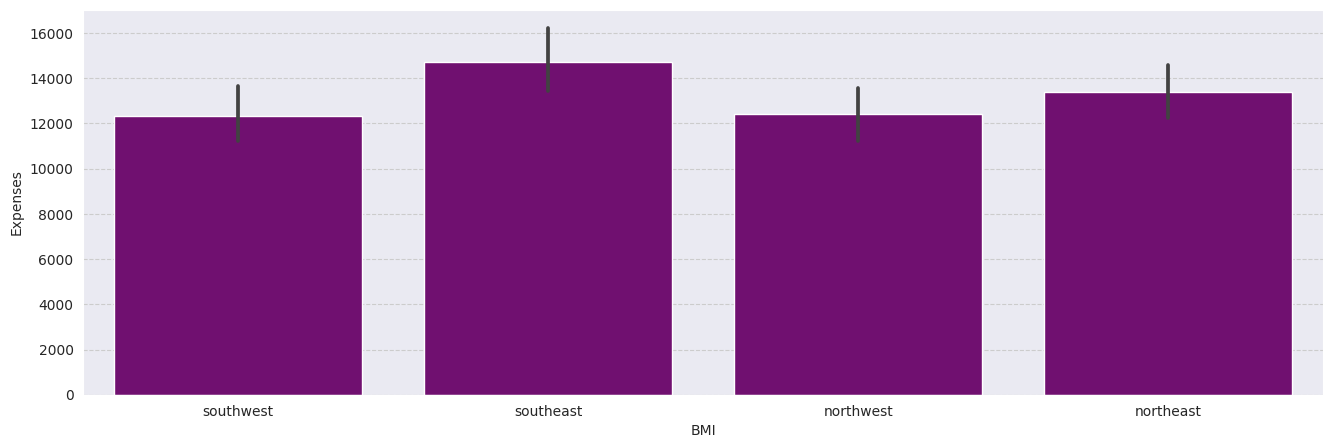

In [24]:
plt.figure(figsize=(16,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(x=df['region'],y=df['expenses'],color="purple")
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.show()

Applicant from southeast have higher expenses

Heat Map

<Axes: >

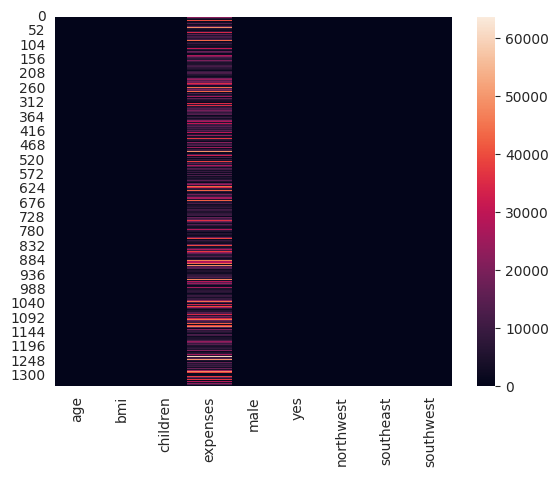

In [60]:
sns.heatmap(df)

# Check outlier

In [ ]:
for col_name in col:
  if(df[col_name])



In [66]:
col=list(df.columns)
col

['age',
 'bmi',
 'children',
 'expenses',
 'male',
 'yes',
 'northwest',
 'southeast',
 'southwest']

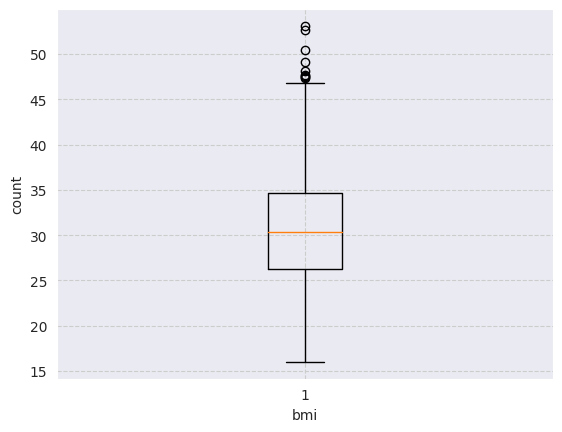

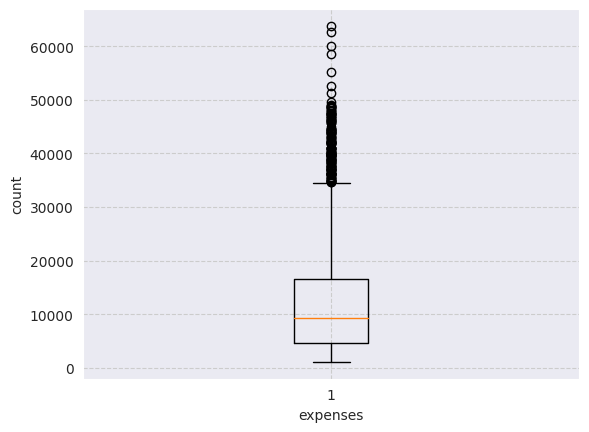

In [69]:
for column_name in col:
  if(df[column_name].dtypes=='64int' or df[column_name].dtypes=='float64'):
    plt.boxplot(df[column_name])
    plt.xlabel(column_name)
    plt.ylabel('count')
    plt.show()

Treating Outliers

In [70]:
Q1=df.bmi.quantile(0.25)
Q3=df.bmi.quantile(0.75)

In [71]:
Q1

26.3

In [72]:
Q3

34.7

In [74]:
# prompt: IQR=Q3-Q1

IQR = Q3 - Q1
IQR

8.400000000000002

In [75]:
Q1-IQR*1.5

13.699999999999998

In [76]:
Q3-1.5*IQR

22.1

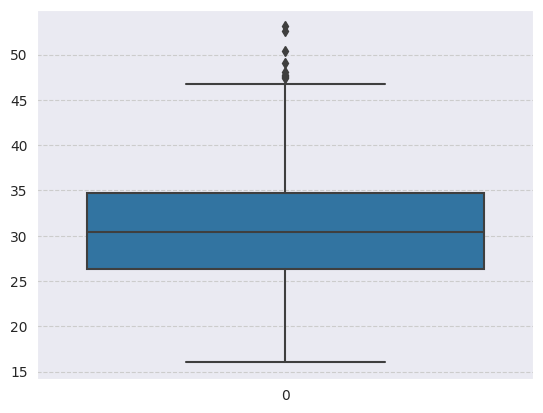

In [80]:
sns.boxplot(df['bmi'])
plt.show()

# Data Preprocessing

In [25]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


#Converting categorical column into dummy variable

In [26]:
def data2col(data,col):
  dummy=pd.get_dummies(data[col],drop_first=True)
  data.drop(col,axis=1,inplace=True)
  data=pd.concat([data,dummy],axis=1)
  return data

In [27]:
for i in df.columns:
  if df[i].dtype==object:
    print(i)
    df=data2col(df,i)

sex
smoker
region


In [28]:
df.head(2)

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0


# Train Test Split

In [29]:
X= df.drop('expenses',axis=1)
y=df.expenses

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [31]:
X_train

,age,bmi,children,male,yes,northwest,southeast,southwest
826,56,31.8,2,1,1,0,1,0
570,31,29.1,0,0,0,0,0,1
520,50,27.4,0,0,0,0,0,0
151,48,29.7,0,1,0,0,1,0
1316,19,20.6,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1223,20,24.4,0,0,1,0,1,0
667,40,32.8,2,0,1,1,0,0
156,48,24.4,0,1,1,0,1,0
384,44,22.1,2,1,0,0,0,0


In [32]:
X_test

,age,bmi,children,male,yes,northwest,southeast,southwest
38,35,36.7,1,1,1,0,0,0
126,19,28.3,0,0,1,0,0,1
479,23,32.6,0,1,0,0,1,0
10,25,26.2,0,1,0,0,0,0
195,19,30.6,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1022,47,36.1,1,1,1,0,1,0
193,56,26.6,1,0,0,1,0,0
67,40,26.3,1,1,0,1,0,0
890,64,26.9,0,0,1,1,0,0


In [33]:
y_train

826     43813.87
570      3761.29
520     25656.58
151      7789.64
1316     1731.68
          ...   
1223    26125.67
667     40003.33
156     21223.68
384      8302.54
645     10141.14
Name: expenses, Length: 1003, dtype: float64

In [34]:
y_test

38      39774.28
126     17081.08
479      1824.29
10       2721.32
195      1639.56
          ...   
1022    42211.14
193     12044.34
67       6389.38
890     29330.98
845     45008.96
Name: expenses, Length: 335, dtype: float64

# Model Fitting

In [35]:
score = []


# Linear Regression model

In [36]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)
pred_LR=model_LR.predict(X_test)

In [37]:
score.append({
    "model" : 'Linear Regression',
    'r2_score' : r2_score(y_test,pred_LR)*100,
    'MS_score' : mean_squared_error(y_test,pred_LR)

})
pred=pred_LR
print("Testing R2 score :" , r2_score(y_test,pred_LR)*100)
print('MS_score :', mean_squared_error(y_test,pred_LR))

Testing R2 score : 78.67159062511256
MS_score : 30718788.155375626


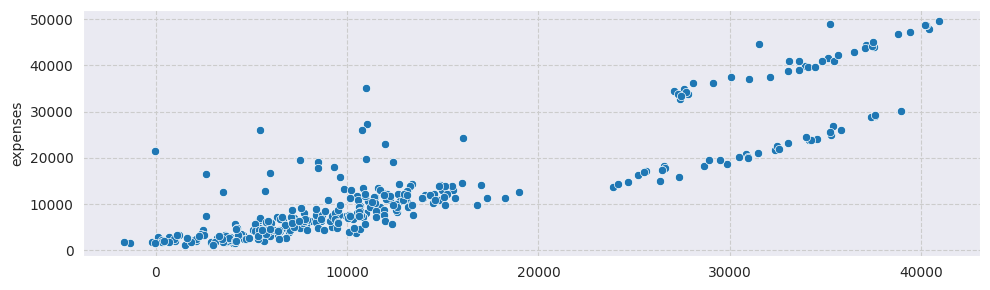

In [38]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.show()

# Decision Tree Regression

In [39]:
model_DT=DecisionTreeRegressor(random_state = 15)
model_DT.fit(X_train,y_train)
pred_DT=model_DT.predict(X_test)

In [40]:
score.append({
   'model' : 'Decision Tree Regressor',
   'r2_score' : r2_score(y_test,pred_DT)*100,
   'ms_score' : mean_squared_error(y_test,pred_DT)
})
pred=pred_DT
print("R2_score :",r2_score(y_test,pred_DT)*100,
      '\n MS_Score :', mean_squared_error(y_test,pred_DT)*100)

R2_score : 80.27634770421021 
 MS_Score : 2840749564.9349256


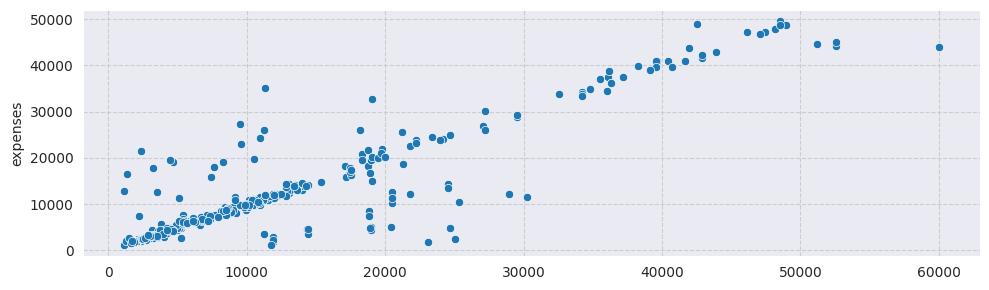

In [41]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.show()

# Random Forest Regressor

In [42]:
model_RFR=RandomForestRegressor(n_estimators=200)
model_RFR.fit(X_train,y_train)
pred_RFR=model_RFR.predict(X_test)

In [43]:
score.append({
    'model' : 'Random Forest Regressor',
    'r2_score' : r2_score(y_test,pred_RFR)*100,
    'ms_score' : mean_squared_error(y_test,pred_RFR)
})
pred=pred_RFR
print("R2_score :",r2_score(y_test,pred_DT)*100,
      '\n MS_Score :', mean_squared_error(y_test,pred_DT)*100)

R2_score : 80.27634770421021 
 MS_Score : 2840749564.9349256


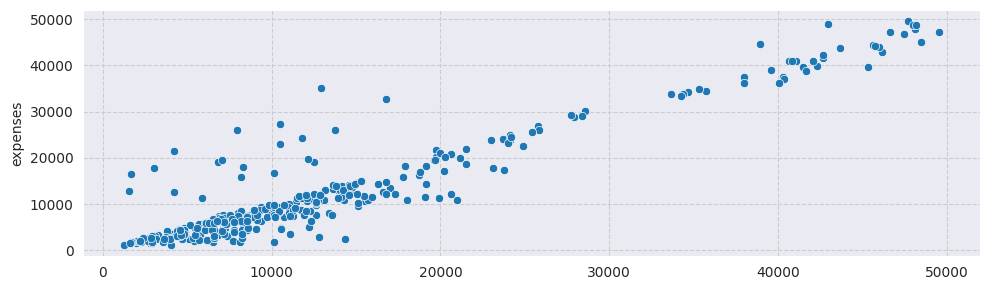

In [44]:
# prompt: plt.figure(figsize=(10,3)) sns.scatterplot(x=pred,y=y_test) plt.tight_layout() plt.show()

plt.figure(figsize=(10,3))
sns.scatterplot(x=pred_RFR,y=y_test)
plt.tight_layout()
plt.show()


# XGB Regressor

In [48]:

model_XGB=XGBRFRegressor()
model_XGB.fit(X_train,y_train)
pred_XGB=model_XGB.predict(X_test)

In [50]:
score.append({
    'model' : 'XGB Regressor',
    'r2_score' : r2_score(y_test,pred_XGB)*100,
    'ms_score' : mean_squared_error(y_test,pred_XGB)
})
pred=pred_XGB
print('r2_score :' ,r2_score(y_test,pred_XGB)*100,
    '\n ms_score :',mean_squared_error(y_test,pred_XGB))

r2_score : 90.33163069573446 
 ms_score : 13925116.648190612


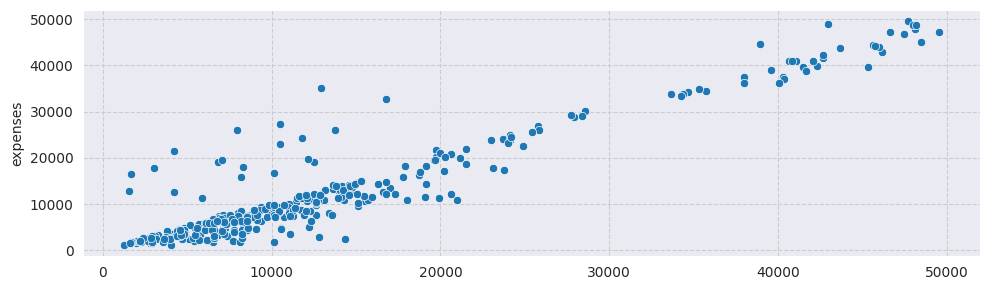

In [51]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=pred_RFR,y=y_test)
plt.tight_layout()
plt.show()


# Model Evaluation

In [53]:
score=pd.DataFrame(score,columns=["model","r2_score","ms_score"])
score.sort_values("r2_score",ascending=True,inplace=True)
score

,model,r2_score,ms_score
0,Linear Regression,78.671591,NaN
1,Decision Tree Regressor,80.276348,2.840750e+07
2,Random Forest Regressor,88.050096,1.721116e+07
3,XGB Regressor,90.331631,1.392512e+07


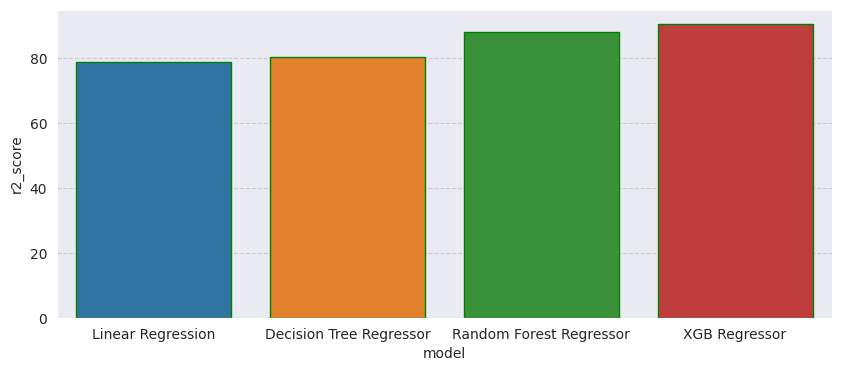

In [81]:
plt.figure(figsize=(10,4))
sns.barplot(x=score['model'],y=score['r2_score'],edgecolor='green')
plt.show()


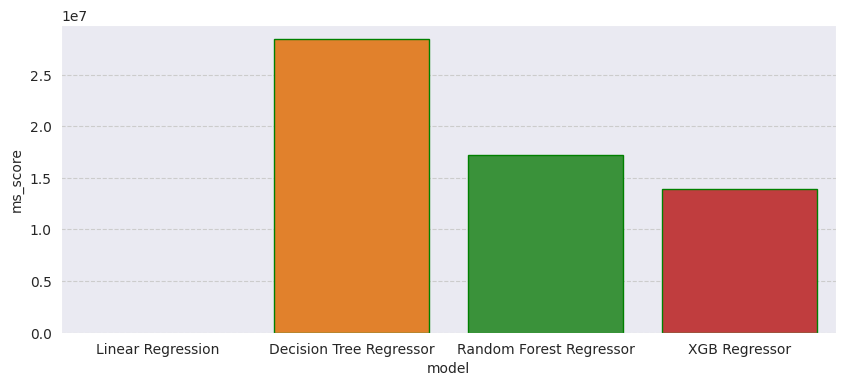

In [57]:
plt.figure(figsize=(10,4))
sns.barplot(x=score['model'],y=score['ms_score'],edgecolor='green')
plt.show()

Here XG Boost regressor is the best model to fit.